## SENO Con MLPClassifier

In [9]:
import numpy as np
# Definir la función objetivo con un pequeño error aleatorio
def target_function(x1, x2, x3):
    y = np.abs(np.sin(2 * np.pi * x1 - x2 + 2 * np.pi * (x3)**2))
    return y

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import sys
sys.path.append('../')
import Modelos

# Cargar los datos
nombre_archivo = "seno.csv"
datos_leidos = pd.read_csv(nombre_archivo)

# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Y', axis=1)  # Características
y = datos_leidos['Y']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los parámetros a optimizar
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Inicializar el clasificador MLP
mlp = MLPClassifier(random_state=42)

mlp = Modelos.optimizar_modelo_clasificacion_randomized("NeuralNetwork", mlp, param_grid, X_train, y_train, X_test, y_test)


NeuralNetwork:
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/gregorio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
S

Mejores hiperparámetros encontrados:
{'solver': 'sgd', 'learning_rate_init': 0.1, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50), 'alpha': 0.0001, 'activation': 'tanh'}

Precisión del modelo en el conjunto de test: 0.965


/home/gregorio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
mlp

{'solver': 'sgd',
 'learning_rate_init': 0.1,
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (50, 50),
 'alpha': 0.0001,
 'activation': 'tanh'}

In [17]:
mlp_clf = MLPClassifier(activation='tanh',
                        alpha=0.0001,
                        hidden_layer_sizes=(50,50),
                        learning_rate='adaptive',
                        learning_rate_init=0.1,
                        solver='sgd')
mlp_clf.fit(X_train, y_train)

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50),
              learning_rate='adaptive', learning_rate_init=0.1, solver='sgd')

In [18]:
import pickle

pickle.dump(mlp_clf, open('nt_seno', 'wb'))

In [19]:
import pickle

loaded_model = pickle.load(open('nt_seno', 'rb'))

## Teórico

In [31]:
import numpy as np
from scipy import integrate

# Definición de la función
def f(x1, x2, x3):
    return np.abs(np.sin(2 * np.pi * x1 - x2 + 2 * np.pi * (x3)**2))

# Función para integrar
def integrand(x1, x2, x3):
    return f(x1, x2, x3)

# Aproximación numérica de la integral para los valores dados
integral_values = []

for x_val in np.arange(0.01, 1, 0.01):
    integral_val, _ = integrate.tplquad(integrand, 0, 1, 0, 1, 0, 1)
    integral_values.append(integral_val)

# Imprimir los valores aproximados de la integral
for i, val in enumerate(integral_values):
    print("x =", round(0.01 * (i + 1), 2), ":", val)

KeyboardInterrupt: 

### PDP

### ALE

## Real

### PDP

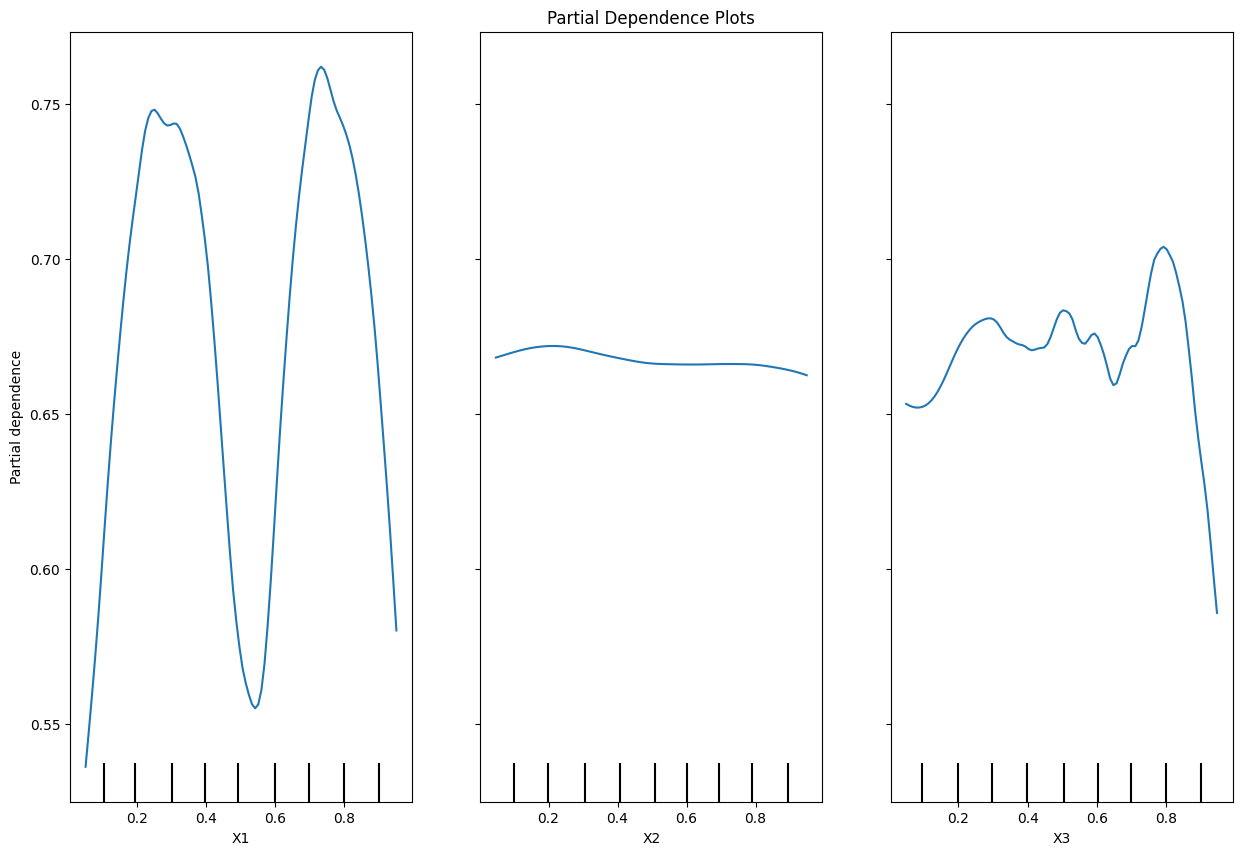

In [21]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=mlp_clf,
    X=X,
    features=(0, 1, 2), # the features to plot
    random_state=5,
    ax=ax,
)
plt.show()

### ALE

In [25]:
#pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

In [26]:
from alepython import ale_plot
feature_list=['X1','X2','X3']

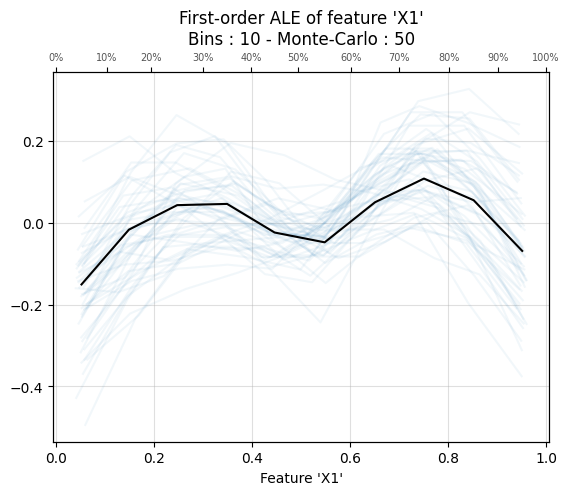

<Axes: title={'center': "First-order ALE of feature 'X1'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'X1'">

In [28]:
ale_plot(mlp_clf, X, 'X1', monte_carlo=True)

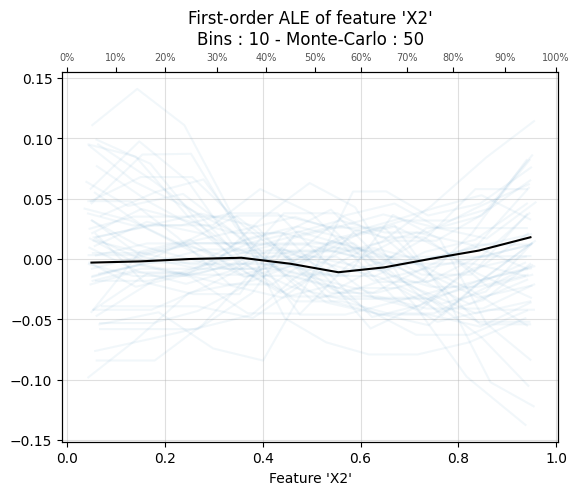

<Axes: title={'center': "First-order ALE of feature 'X2'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'X2'">

In [29]:
ale_plot(mlp_clf, X, 'X2', monte_carlo=True)

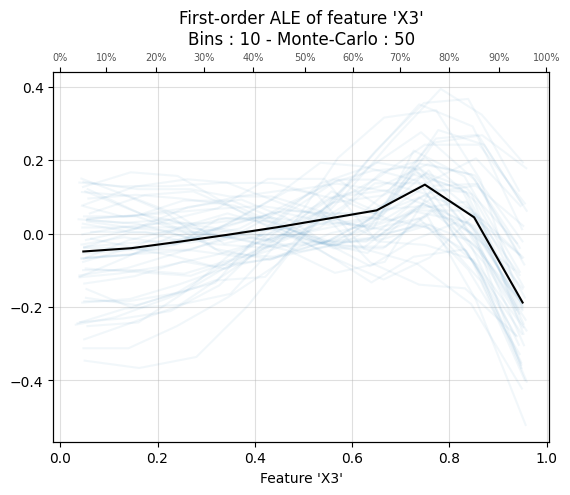

<Axes: title={'center': "First-order ALE of feature 'X3'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'X3'">

In [30]:
ale_plot(mlp_clf, X, 'X3', monte_carlo=True)

# DESCARTADO

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Cargar los datos
nombre_archivo = "seno.csv"
datos_leidos = pd.read_csv(nombre_archivo)

# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Y', axis=1)  # Características
y = datos_leidos['Y']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de red neuronal
modelo = Sequential()
modelo.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Capa oculta con 128 neuronas y función de activación ReLU
modelo.add(Dense(64, activation='relu'))  # Capa oculta con 64 neuronas y función de activación ReLU
modelo.add(Dense(1, activation='sigmoid'))  # Capa de salida con 1 neurona y función de activación sigmoide

# Compilar el modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
modelo.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
puntuacion = modelo.evaluate(X_test, y_test)
print("Precisión del modelo: %.2f%%" % (puntuacion[1] * 100))

nt_clf = modelo

Epoch 1/20
125/125 [==============================] - 1s 3ms/step - loss: 0.6399 - accuracy: 0.6695 - val_loss: 0.6311 - val_accuracy: 0.6710
Epoch 2/20
125/125 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.6693 - val_loss: 0.6286 - val_accuracy: 0.6700
Epoch 3/20
125/125 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.6815 - val_loss: 0.6223 - val_accuracy: 0.6910
Epoch 4/20
125/125 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.7023 - val_loss: 0.6187 - val_accuracy: 0.6910
Epoch 5/20
125/125 [==============================] - 0s 2ms/step - loss: 0.6067 - accuracy: 0.7080 - val_loss: 0.6150 - val_accuracy: 0.7030
Epoch 6/20
125/125 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.7082 - val_loss: 0.6154 - val_accuracy: 0.7000
Epoch 7/20
125/125 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.7082 - val_loss: 0.6050 - val_accuracy: 0.7050
Epoch 